In [1]:
import numpy as np
import pandas as pd 
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tr = pd.read_csv('C:/Users/**.csv') #upload a csv file with the coordinates found by using TrackPy library

In [4]:
tr.head()

,frame,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame.1,particle
0,0,94,517.669909,1006.168847,3594.786237,5.537951,0.034253,34.569117,126991.0,-0.000941,0,3
1,1,225,517.537618,1005.937722,3892.242284,5.439407,0.021006,39.451150,127768.0,-0.000000,1,3
2,2,350,517.349553,1005.181104,3742.263339,5.806315,0.091401,32.662128,127003.0,-0.000000,2,3
3,3,475,516.290161,1005.865377,3945.038910,6.256874,0.120448,34.089103,127364.0,-0.000000,3,3
4,4,600,516.467691,1005.261876,3582.609966,5.694682,0.063576,30.657551,126942.0,-0.000000,4,3


In [5]:
coord=tr[["particle", "frame", "x", "y"]]

In [6]:
coord.head()

,particle,frame,x,y
0,3,0,1006.168847,517.669909
1,3,1,1005.937722,517.537618
2,3,2,1005.181104,517.349553
3,3,3,1005.865377,516.290161
4,3,4,1005.261876,516.467691


In [7]:
a=[coord[coord["particle"]==i].frame.max() for i in range(coord["particle"].max())]

In [8]:
max_frame_particle=pd.DataFrame(a)

In [9]:
a=[coord[coord["particle"]==i].frame.min() for i in range(coord["particle"].max())]

In [10]:
min_frame_particle=pd.DataFrame(a)

In [11]:
no_frame_particle=max_frame_particle-min_frame_particle

In [12]:
no_frame_particle.columns=["Frame Count"]

In [13]:
particle_no=no_frame_particle[no_frame_particle["Frame Count"]>20].index

In [14]:
filtered_part=pd.DataFrame(particle_no)

In [15]:
filtered_part.columns=["particle_num"]

In [16]:
#filtering the particles which contains in more than 20 frames
filtered_coord=[coord[coord["particle"]==i] for i in no_frame_particle[no_frame_particle["Frame Count"]>20].index]

In [17]:
df_filtered_coord=pd.concat(filtered_coord)

In [18]:
df_filtered_coord.head()

,particle,frame,x,y
0,3,0,1006.168847,517.669909
1,3,1,1005.937722,517.537618
2,3,2,1005.181104,517.349553
3,3,3,1005.865377,516.290161
4,3,4,1005.261876,516.467691


In [19]:
um_per_px=1/3.16 #converting pixel to micrometer

In [20]:
xum1=df_filtered_coord.x*um_per_px

In [21]:
df_filtered_coord["x"]=df_filtered_coord.x*um_per_px

In [22]:
df_filtered_coord["y"]=df_filtered_coord.y*um_per_px

In [23]:
fps=25.2

In [24]:
cx=[df_filtered_coord[(df_filtered_coord["particle"]==i) & (df_filtered_coord["frame"]==df_filtered_coord[df_filtered_coord["particle"]==i].frame.min())].x for i in filtered_part.particle_num]

In [25]:
dx=[df_filtered_coord[(df_filtered_coord["particle"]==i) & (df_filtered_coord["frame"]==df_filtered_coord[df_filtered_coord["particle"]==i].frame.max())].x for i in filtered_part.particle_num]

In [26]:
X1=[((float(dx[i])-float(cx[i]))**2) for i in range(len(filtered_coord))]
X11=[((float(dx[i])-float(cx[i]))) for i in range(len(filtered_coord))]
iX=[((float(cx[i]))) for i in range(len(filtered_coord))]

In [27]:
cy=[df_filtered_coord[(df_filtered_coord["particle"]==i) & (df_filtered_coord["frame"]==df_filtered_coord[df_filtered_coord["particle"]==i].frame.min())].y for i in filtered_part.particle_num]

In [28]:
dy=[df_filtered_coord[(df_filtered_coord["particle"]==i) & (df_filtered_coord["frame"]==df_filtered_coord[df_filtered_coord["particle"]==i].frame.max())].y for i in filtered_part.particle_num]

In [29]:
Y1=[((float(dy[i])-float(cy[i]))**2) for i in range(len(filtered_coord))]
Y11=[((float(dy[i])-float(cy[i]))) for i in range(len(filtered_coord))]
iY=[((float(cy[i]))) for i in range(len(filtered_coord))]

In [30]:
x1=np.array(X1)
x11=np.array(X11)

In [31]:
y1=np.array(Y1)
y11=np.array(Y11)

In [32]:
ds=[math.sqrt(x1[i]+y1[i]) for i in range(len(filtered_coord))]

In [33]:
T1=[(int(df_filtered_coord[df_filtered_coord["particle"]==i].frame.max())+1)/fps-(int(df_filtered_coord[df_filtered_coord["particle"]==i].frame.min())+1)/fps for i in filtered_part.particle_num] 

In [34]:
t1=np.array(T1)

In [35]:
vs=ds/t1
vx=x11/t1
vy=y11/t1

In [36]:
min(vs), max(vs)

(2.5205496512700982, 3.95504902486361)

Text(0.5, 1.0, 'Velocity Distribution')

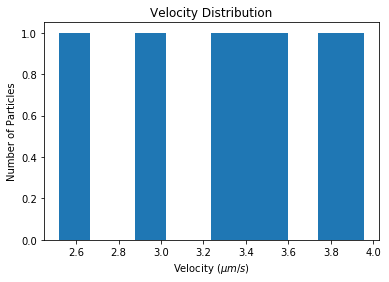

In [37]:
plt.hist(vs, bins=20)
plt.xlabel('Velocity ($\mu m/s$)')
plt.ylabel('Number of Particles')
plt.title('Velocity Distribution')

In [38]:
np.mean(vs), np.median(vs)

(3.300779670227545, 3.378065244135161)

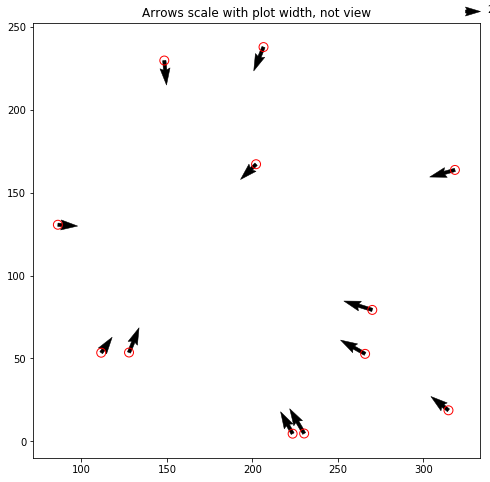

In [40]:
plt.figure(figsize=(8,8))
plt.title('Arrows scale with plot width, not view')
Q = plt.quiver(iX, iY, vx*norm, vy*norm, units='width', edgecolor='k', facecolor='k', linewidth=.5)
qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

plt.scatter(iX, iY, facecolors='none', edgecolors='r', s=80)
#plt.savefig('Blackarrow.png')

In [41]:
norm = 6 /np.sqrt(vx**2+vy**2)
#norm=1

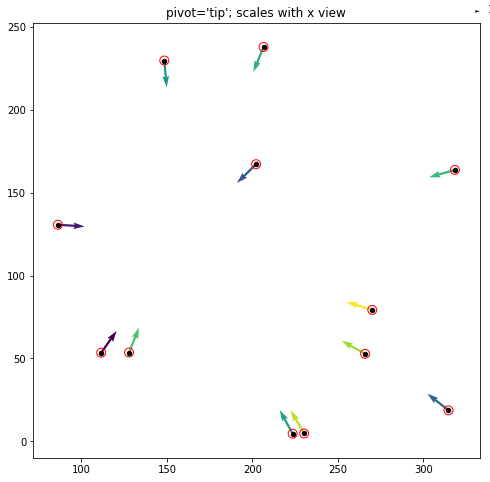

In [42]:
plt.figure(figsize=(8,8))
plt.title("pivot='tip'; scales with x view")
M = np.hypot(vx, vy)
Q = plt.quiver(iX, iY, vx*norm, vy*norm, M, units='width', pivot='tail', width=0.005,
               scale=100)
qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.scatter(iX, iY, facecolors='none', edgecolors='r', s=80)
plt.scatter(iX, iY, color='k', s=20)
#plt.savefig('Colorarrow.png')

In [43]:
Vs=pd.DataFrame(vs)
Vs.columns=['Velocity']
Vs['Power']=17.2
Vs['Position']='On'

In [44]:
Vs.head()

,Velocity,Power,Position
0,3.482648,17.2,On
1,3.274131,17.2,On
2,3.748986,17.2,On
3,3.955049,17.2,On
4,2.520550,17.2,On


In [45]:
Vs.to_csv('C:/Users/**.csv') #saving the output file